# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.layers import  Dense
import warnings

import joblib

In [2]:
# Filter warnings.
warnings.filterwarnings('ignore')

In [3]:
# Load dataset
df = pd.read_csv("Final_Augmented_dataset_Diseases_and_Symptoms.csv")

In [4]:
df.head(20)

,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
0,panic disorder,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,panic disorder,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,panic disorder,1,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,panic disorder,1,0,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,panic disorder,1,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
5,panic disorder,0,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,panic disorder,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,panic disorder,0,0,0,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
8,panic disorder,1,0,0,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
9,panic disorder,1,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# EXPLORATORY DATA ANALYSIS.

In [5]:
# Dataframe shape
df.shape

(246945, 378)

In [6]:
#Check for duplicates
df.duplicated().value_counts()

False    189647
True      57298
Name: count, dtype: int64

In [7]:
# Remove duplicated rows and columns
df = df.drop_duplicates().reset_index(drop=True)

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189647 entries, 0 to 189646
Columns: 378 entries, diseases to neck weakness
dtypes: int64(377), object(1)
memory usage: 546.9+ MB


In [10]:
df.dtypes

diseases                            object
anxiety and nervousness              int64
depression                           int64
shortness of breath                  int64
depressive or psychotic symptoms     int64
                                     ...  
hip weakness                         int64
back swelling                        int64
ankle stiffness or tightness         int64
ankle weakness                       int64
neck weakness                        int64
Length: 378, dtype: object

In [11]:
df.isna().sum()

diseases                            0
anxiety and nervousness             0
depression                          0
shortness of breath                 0
depressive or psychotic symptoms    0
                                   ..
hip weakness                        0
back swelling                       0
ankle stiffness or tightness        0
ankle weakness                      0
neck weakness                       0
Length: 378, dtype: int64

In [12]:
df.columns

Index(['diseases', 'anxiety and nervousness', 'depression',
       'shortness of breath', 'depressive or psychotic symptoms',
       'sharp chest pain', 'dizziness', 'insomnia',
       'abnormal involuntary movements', 'chest tightness',
       ...
       'stuttering or stammering', 'problems with orgasm', 'nose deformity',
       'lump over jaw', 'sore in nose', 'hip weakness', 'back swelling',
       'ankle stiffness or tightness', 'ankle weakness', 'neck weakness'],
      dtype='object', length=378)

In [13]:
# Replace spaces with underscores in column names
df.columns = df.columns.str.replace(' ', '_')

In [14]:
df.columns

Index(['diseases', 'anxiety_and_nervousness', 'depression',
       'shortness_of_breath', 'depressive_or_psychotic_symptoms',
       'sharp_chest_pain', 'dizziness', 'insomnia',
       'abnormal_involuntary_movements', 'chest_tightness',
       ...
       'stuttering_or_stammering', 'problems_with_orgasm', 'nose_deformity',
       'lump_over_jaw', 'sore_in_nose', 'hip_weakness', 'back_swelling',
       'ankle_stiffness_or_tightness', 'ankle_weakness', 'neck_weakness'],
      dtype='object', length=378)

### Plot Most Frequent Diseases

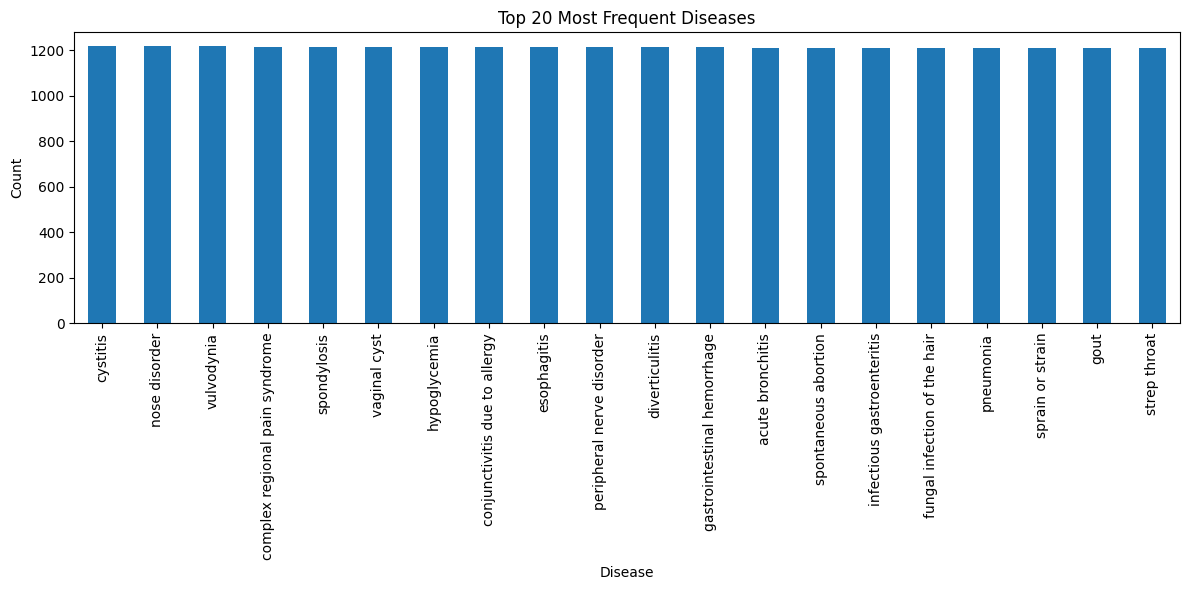

In [15]:
plt.figure(figsize=(12, 6))

df['diseases'].value_counts().head(20).plot(kind='bar')
plt.title("Top 20 Most Frequent Diseases")
plt.xlabel("Disease")
plt.ylabel("Count")

plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

In [16]:
df["diseases"]

0                 panic disorder
1                 panic disorder
2                 panic disorder
3                 panic disorder
4                 panic disorder
                   ...          
189642    open wound of the nose
189643    open wound of the nose
189644    open wound of the nose
189645    open wound of the nose
189646    open wound of the nose
Name: diseases, Length: 189647, dtype: object

### Text Column Encoding.

In [17]:
le = LabelEncoder()
df['label'] = le.fit_transform(df['diseases'])

In [18]:
# Check result
print(df[['diseases', 'label']].head(10))

         diseases  label
0  panic disorder    531
1  panic disorder    531
2  panic disorder    531
3  panic disorder    531
4  panic disorder    531
5  panic disorder    531
6  panic disorder    531
7  panic disorder    531
8  panic disorder    531
9  panic disorder    531


## 1. Barplot: Most Common Symptoms for a Specific Disease
- You can calculate and visualize the top N symptoms in "panic disorder" for example.

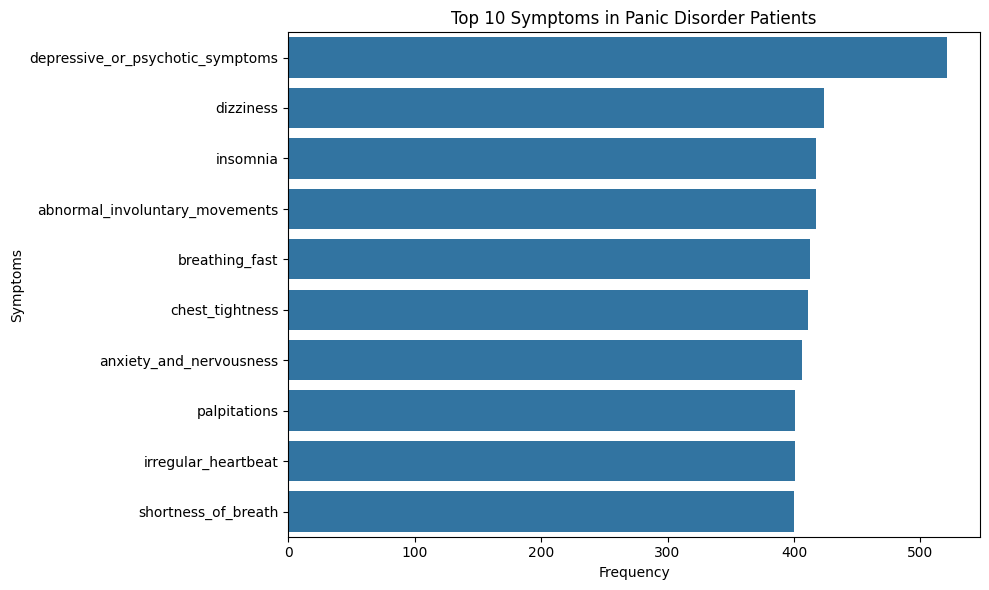

In [19]:
# Filter panic disorder cases
panic_df = df[df['label'] == 531]

# Select only numeric columns (binary symptoms)
numeric_panic_df = panic_df.select_dtypes(include='number')

# Drop the 'label' column if it's numeric and not part of symptoms
numeric_panic_df = numeric_panic_df.drop(columns=['label'])

# Sum binary symptom values and sort the top 10
symptom_sums = numeric_panic_df.sum().sort_values(ascending=False)[:10]

# Bar plot
plt.figure(figsize=(10, 6))
sn.barplot(x=symptom_sums.values, y=symptom_sums.index)
plt.title("Top 10 Symptoms in Panic Disorder Patients")
plt.xlabel("Frequency")
plt.ylabel("Symptoms")

plt.tight_layout()
plt.show()

## 2. Violinplot: Symptom Distribution across bottom Diseases
- Choose a symptom (e.g., dizziness) and compare its occurrence in the bottom diseases.

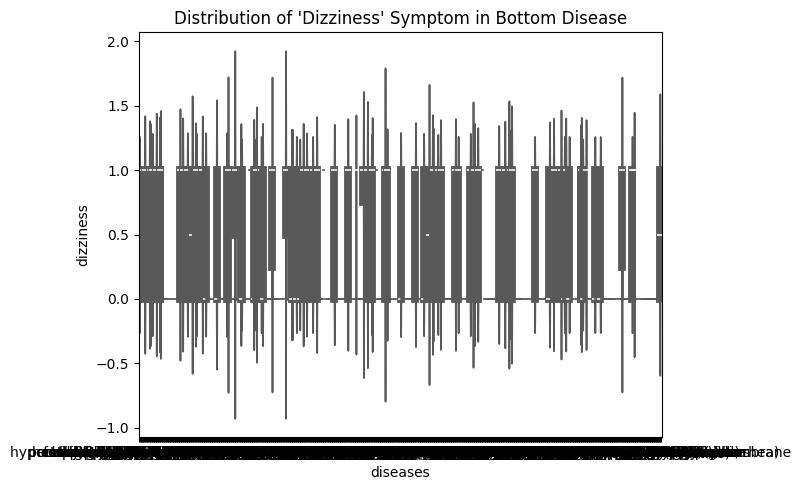

In [20]:
# Get the Bottom most frequent diseases
bottom1 = df['label'].value_counts().index[:-1]
filtered_df = df[df['label'].isin(bottom1)].copy()

# Map label back to disease name (if you have the label encoder `le`)
filtered_df['diseases'] = le.inverse_transform(filtered_df['label'])

# Violin plot
plt.figure(figsize=(8, 5))
sn.violinplot(data=filtered_df, x='diseases', y='dizziness', palette='Set2')
plt.title("Distribution of 'Dizziness' Symptom in Bottom Disease")

plt.tight_layout()
plt.show()

## 3. Boxplot: Compare 'shortness_of_breath' across bottom 2 Diseases

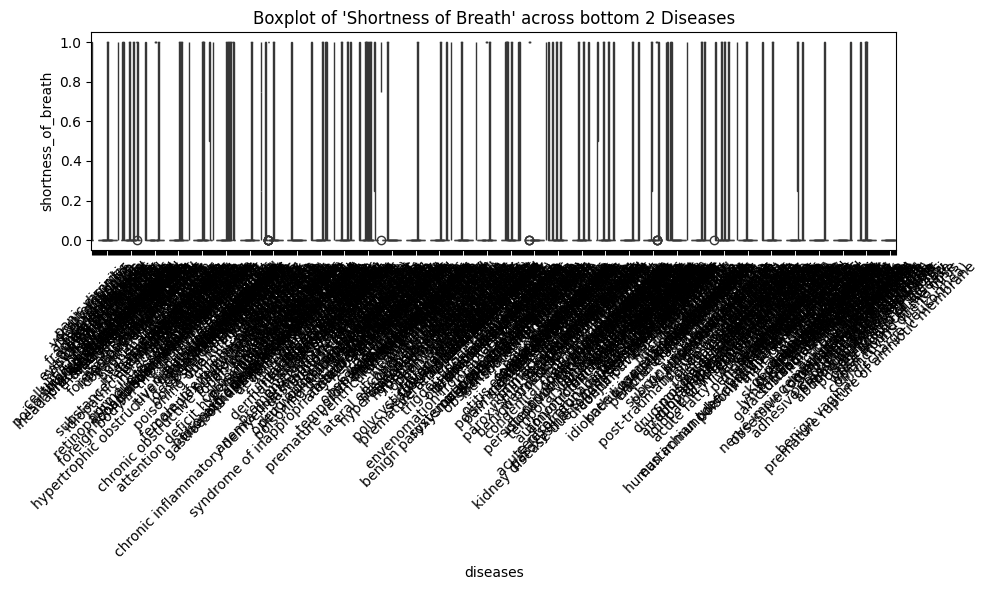

In [21]:
# bottom 2 diseases
bottom2 = df['label'].value_counts().index[:-2]
filtered_df = df[df['label'].isin(bottom2)].copy()
filtered_df['diseases'] = le.inverse_transform(filtered_df['label'])

plt.figure(figsize=(10, 6))
sn.boxplot(data=filtered_df, x='diseases', y='shortness_of_breath', palette='coolwarm')
plt.title("Boxplot of 'Shortness of Breath' across bottom 2 Diseases")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 4. Heatmap: Correlation between Top 15 Frequent Symptoms

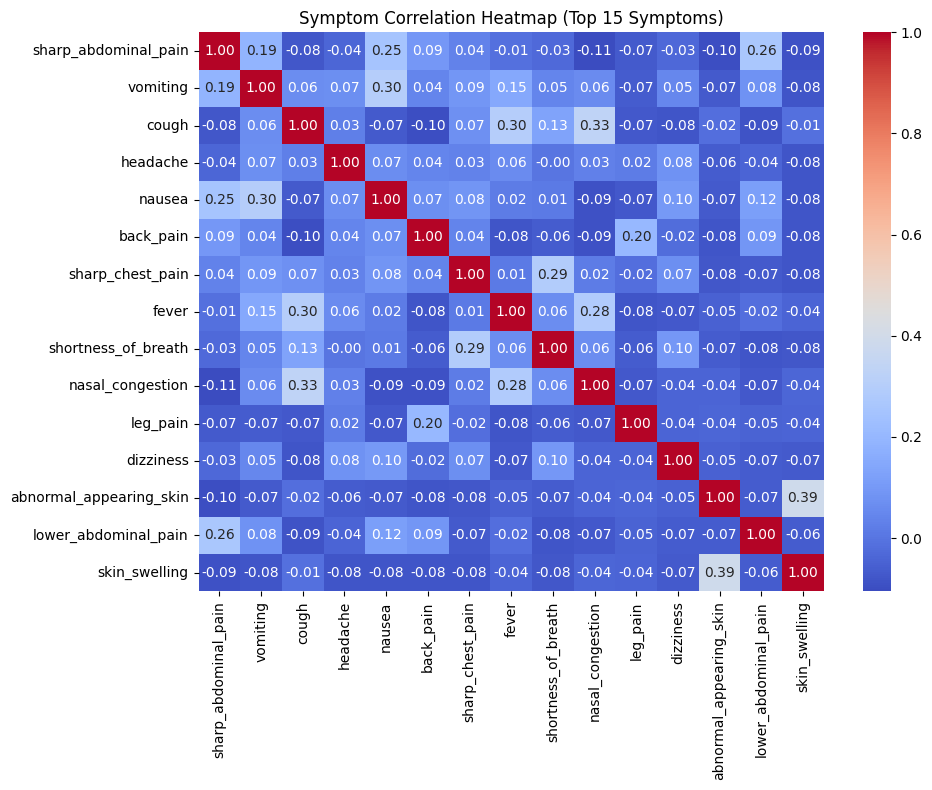

In [22]:
# Get top 15 most frequent symptoms
symptom_counts = df.select_dtypes(include='number').drop(columns=['label']).sum().sort_values(ascending=False)[:15]
top_symptoms = symptom_counts.index.tolist()

# Correlation matrix
corr = df[top_symptoms].corr()

plt.figure(figsize=(10, 8))
sn.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Symptom Correlation Heatmap (Top 15 Symptoms)")

plt.tight_layout()
plt.show()

## Example: Plot how rarely "insomnia" appears in top diseases

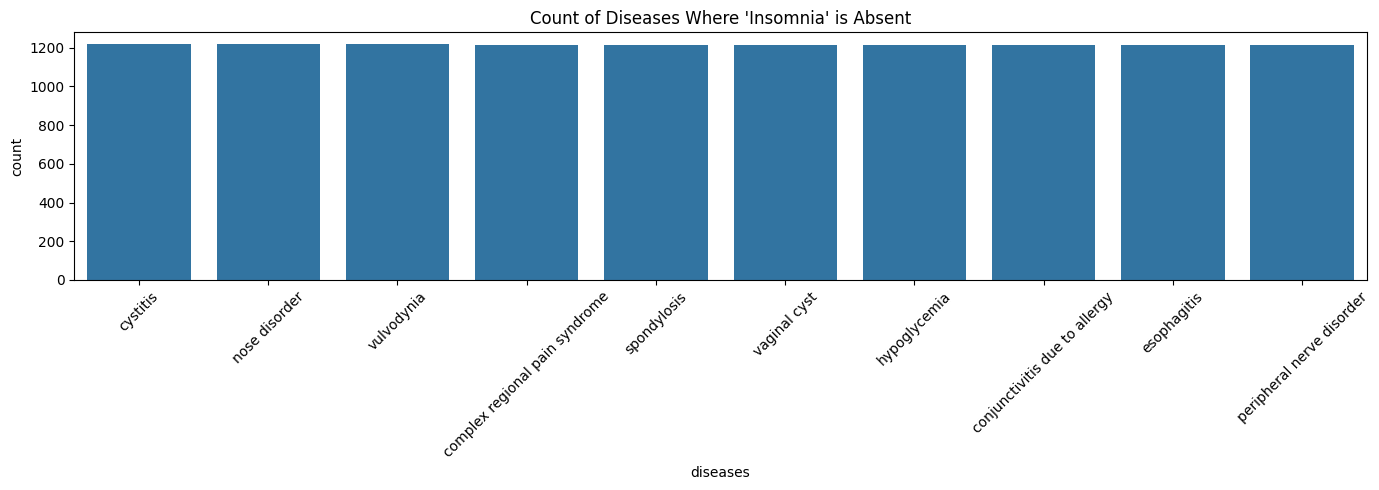

In [23]:
df['diseases'] = le.inverse_transform(df['label'])

plt.figure(figsize=(14, 5))
sn.countplot(data=df[df['insomnia'] == 0], x='diseases', order=df['diseases'].value_counts().index[:10])
plt.title("Count of Diseases Where 'Insomnia' is Absent")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Remove the diseases column

In [24]:
df = df.drop(["diseases"], axis=1).copy()
df.head()

,anxiety_and_nervousness,depression,shortness_of_breath,depressive_or_psychotic_symptoms,sharp_chest_pain,dizziness,insomnia,abnormal_involuntary_movements,chest_tightness,palpitations,...,problems_with_orgasm,nose_deformity,lump_over_jaw,sore_in_nose,hip_weakness,back_swelling,ankle_stiffness_or_tightness,ankle_weakness,neck_weakness,label
0,1,0,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,531
1,0,0,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,531
2,1,1,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,531
3,1,0,0,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,531
4,1,1,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,531


# Split features and target

In [27]:
X = df.drop(["label"], axis=1)
y = df["label"]

In [28]:
X.shape, y.shape

((189647, 377), (189647,))

In [30]:
X.head()

,anxiety_and_nervousness,depression,shortness_of_breath,depressive_or_psychotic_symptoms,sharp_chest_pain,dizziness,insomnia,abnormal_involuntary_movements,chest_tightness,palpitations,...,stuttering_or_stammering,problems_with_orgasm,nose_deformity,lump_over_jaw,sore_in_nose,hip_weakness,back_swelling,ankle_stiffness_or_tightness,ankle_weakness,neck_weakness
0,1,0,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
X.columns

Index(['anxiety_and_nervousness', 'depression', 'shortness_of_breath',
       'depressive_or_psychotic_symptoms', 'sharp_chest_pain', 'dizziness',
       'insomnia', 'abnormal_involuntary_movements', 'chest_tightness',
       'palpitations',
       ...
       'stuttering_or_stammering', 'problems_with_orgasm', 'nose_deformity',
       'lump_over_jaw', 'sore_in_nose', 'hip_weakness', 'back_swelling',
       'ankle_stiffness_or_tightness', 'ankle_weakness', 'neck_weakness'],
      dtype='object', length=377)

In [31]:
joblib.dump(list(X.columns), "symptom_columns.pkl")

['symptom_columns.pkl']

In [32]:
# Split the dataset to train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [33]:
x_train.shape, x_test.shape, y_test.shape, y_train.shape

((151717, 377), (37930, 377), (37930,), (151717,))

# MODEL CREATION.

In [34]:
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

### PREDICTION AND SCORING

In [35]:
y_pred = lr.predict(x_test)

In [36]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.834748220406011
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.87      0.96      0.91        49
           2       0.79      0.76      0.77        29
           3       0.00      0.00      0.00         1
           4       0.63      0.88      0.73        25
           5       1.00      0.50      0.67         2
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         4
           8       0.82      0.74      0.78        82
           9       0.95      0.70      0.80       155
          10       0.89      0.93      0.91       238
          11       0.90      0.64      0.74       247
          12       0.72      0.82      0.77       166
          14       0.27      0.20      0.23        30
          15       0.98      0.92      0.95       168
          16       0.69      0.83      0.75       108
          17       0.88      0.88

## NEURAL NETWORK MODEL.

In [37]:
model = Sequential([
    Dense(512, input_shape=(X.shape[1],), activation='relu'),
    Dense(256, activation='relu'),
    Dense(len(y.unique()), activation='softmax')
])

In [38]:
# Compile the model and show a summary
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         193,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 773)                 │         198,661 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 523,525 (2.00 MB)

 Trainable params: 523,525 (2.00 MB)

 Non-trainable params: 0 (0.00 B)

### Fit and Train the Model

In [39]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=100)

Epoch 1/20
2371/2371 ━━━━━━━━━━━━━━━━━━━━ 33s 10ms/step - accuracy: 0.6210 - loss: 1.8827 - val_accuracy: 0.8168 - val_loss: 0.5155
Epoch 2/20
2371/2371 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.8223 - loss: 0.4843 - val_accuracy: 0.8186 - val_loss: 0.4863
Epoch 3/20
2371/2371 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.8300 - loss: 0.4396 - val_accuracy: 0.8185 - val_loss: 0.4779
Epoch 4/20
2371/2371 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.8370 - loss: 0.4141 - val_accuracy: 0.8195 - val_loss: 0.4679
Epoch 5/20
2371/2371 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.8378 - loss: 0.4033 - val_accuracy: 0.8172 - val_loss: 0.4674
Epoch 6/20
2371/2371 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - accuracy: 0.8411 - loss: 0.3909 - val_accuracy: 0.8198 - val_loss: 0.4656
Epoch 7/20
2371/2371 ━━━━━━━━━━━━━━━━━━━━ 26s 11ms/step - accuracy: 0.8442 - loss: 0.3777 - val_accuracy: 0.8185 - val_loss: 0.4654
Epoch 8/20
2371/2371 ━━━━━━━━━━━━━━━━━━━━ 30s 13ms/step - accuracy: 0.8455 - los

In [40]:
# Evaluate the model after training.
loss, acc = model.evaluate(x_test, y_test)
print(f"MLP Model Accuracy: {acc:.4f}")

1186/1186 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8074 - loss: 0.5205
MLP Model Accuracy: 0.8059


# Logistic Regression VS Neural Network Model Comparison.

In [41]:
lr_preds = lr.predict(x_test)
nn_preds = np.argmax(model.predict(x_test), axis=1)

# Accuracy scores
lr_acc = accuracy_score(y_test, lr_preds)
nn_acc = accuracy_score(y_test, nn_preds)

print(f"Logistic Regression Accuracy: {lr_acc:.4f}")
print(f"Neural Network Accuracy: {nn_acc:.4f}")

1186/1186 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
Logistic Regression Accuracy: 0.8347
Neural Network Accuracy: 0.8059


# Models Performance Plot.

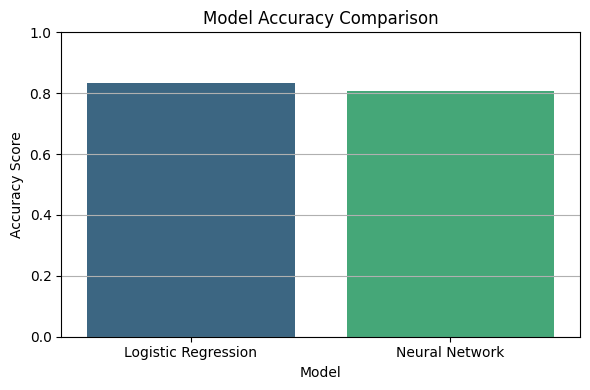

In [42]:
# Create DataFrame for plotting
accuracy_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Neural Network'],
    'Accuracy': [lr_acc, nn_acc]
})

# Plot
plt.figure(figsize=(6, 4))
sn.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='viridis')
plt.ylim(0, 1.0)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy Score')
plt.xlabel('Model')

plt.grid(axis='y')
plt.tight_layout()

plt.show()

## See The Wrong Predictions From The Two Models

In [43]:
# Find incorrect predictions for each model
lr_incorrect = np.where(y_test != lr_preds)[0]  # Indices of wrong predictions for Logistic Regression
nn_incorrect = np.where(y_test != nn_preds)[0]  # Indices of wrong predictions for Neural Network

In [44]:
y_test.shape, nn_preds.shape, lr_preds.shape, type(y_test), type(nn_preds), type(lr_preds), lr_incorrect.shape, nn_incorrect.shape

((37930,),
 (37930,),
 (37930,),
 pandas.core.series.Series,
 numpy.ndarray,
 numpy.ndarray,
 (6268,),
 (7364,))

In [45]:
lr_preds[lr_incorrect], nn_preds[nn_incorrect]

(array([323,  10, 743, ..., 314, 745, 169]),
 array([286,  10, 581, ..., 138, 745, 474]))

### Plot the wrong predictions for each of the models.

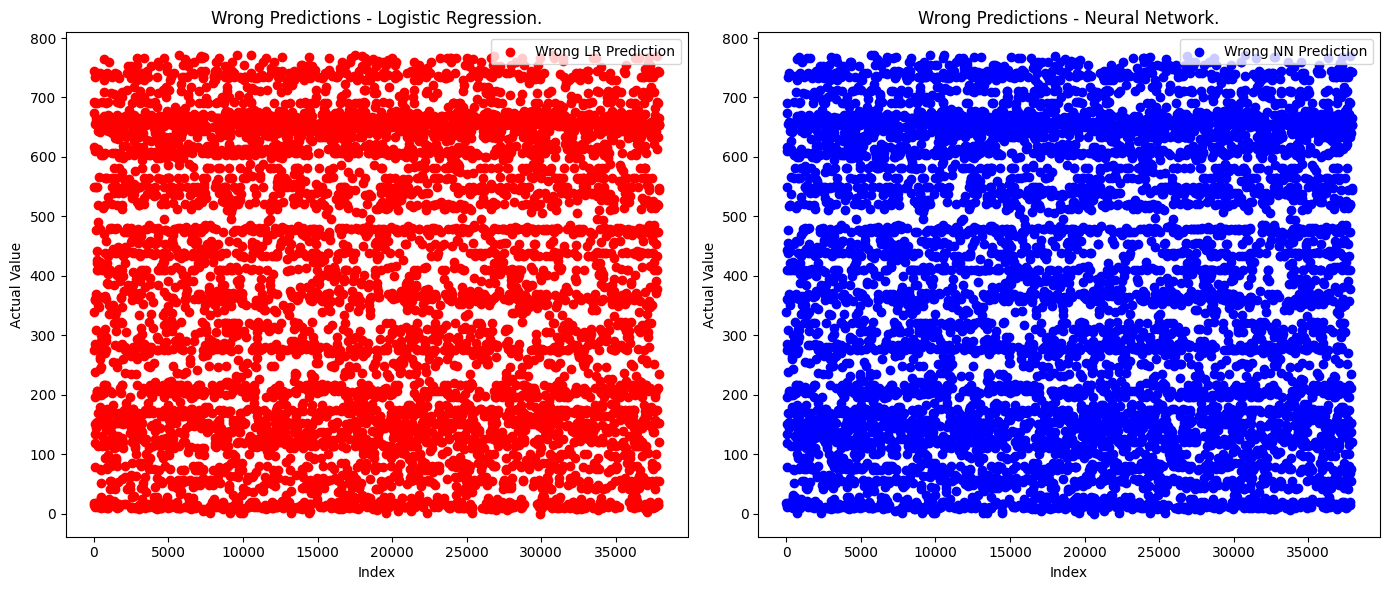

In [46]:
# Set up the plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot wrong predictions for Logistic Regression
axes[0].scatter(np.arange(len(y_test))[lr_incorrect], y_test.iloc[lr_incorrect], color='r', label='Wrong LR Prediction')
axes[0].set_title('Wrong Predictions - Logistic Regression.')
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Actual Value')
axes[0].legend()

# Plot wrong predictions for Neural Network
axes[1].scatter(np.arange(len(y_test))[nn_incorrect], y_test.iloc[nn_incorrect], color='b', label='Wrong NN Prediction')
axes[1].set_title('Wrong Predictions - Neural Network.')
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Actual Value')
axes[1].legend()

# Display the plot
plt.tight_layout()
plt.show()

In [47]:
# Create DataFrame for Logistic Regression wrong predictions
wrong_lr_preds = pd.DataFrame({
    'Index': np.arange(len(y_test))[lr_incorrect],  # Index of wrong predictions
    'True Value': y_test.iloc[lr_incorrect],       # True values
    'Logistic Prediction': lr_preds[lr_incorrect], # Predictions from Logistic Regression
})

# Create DataFrame for Neural Network wrong predictions
wrong_nn_preds = pd.DataFrame({
    'Index': np.arange(len(y_test))[nn_incorrect],  # Index of wrong predictions
    'True Value': y_test.iloc[nn_incorrect],       # True values
    'NN Prediction': nn_preds[nn_incorrect], # Predictions from Neural Network
})

In [48]:
wrong_lr_preds.head()

,Index,True Value,Logistic Prediction
155695,1,339,323
117249,6,18,10
2113,9,745,743
170401,10,550,477
118253,16,692,672


In [49]:
wrong_nn_preds.head()

,Index,True Value,NN Prediction
155695,1,339,286
117249,6,18,10
170401,10,550,581
174148,19,674,235
103880,25,616,702


In [50]:
# See the corresponding feature rows (from X_test) for index 1 and 6
print("\nFeature Values for index 1 and 6 from X_test:")
selected_rows = x_test.iloc[[6, 9]]

selected_rows


Feature Values for index 1 and 6 from X_test:


,anxiety_and_nervousness,depression,shortness_of_breath,depressive_or_psychotic_symptoms,sharp_chest_pain,dizziness,insomnia,abnormal_involuntary_movements,chest_tightness,palpitations,...,stuttering_or_stammering,problems_with_orgasm,nose_deformity,lump_over_jaw,sore_in_nose,hip_weakness,back_swelling,ankle_stiffness_or_tightness,ankle_weakness,neck_weakness
117249,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2113,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Predicting New Patient Data.

In [51]:
def predict_disease(symptom_vector):
    """
    Utility function to aid in the prediction of a disease from new symptoms.
    """
    symptom_vector = np.array(symptom_vector).reshape(1, -1)

    # Logistic Regression prediction
    lr_pred = lr.predict(symptom_vector)[0]
    lr_label = le.inverse_transform([lr_pred])[0]

    # Neural Network prediction
    nn_pred = model.predict(symptom_vector)
    nn_pred_class = np.argmax(nn_pred, axis=1)[0]
    nn_label = le.inverse_transform([nn_pred_class])[0]

    return lr_label, nn_label

### Prediction Simulation.

In [52]:
test_vector = X.iloc[0].values  # simulate from existing row

# Reshape to 2D for prediction
test_vector_2d = test_vector.reshape(1, -1)

lr_result, nn_result = predict_disease(test_vector_2d)
print("Logistic Regression Prediction:", lr_result)
print("MLP Prediction:", nn_result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Logistic Regression Prediction: panic disorder
MLP Prediction: panic disorder


## Create Fake Data To Test The Simulation Logic

In [53]:
# Get number of symptoms from your training set
num_symptoms = X.shape[1]  # same structure as your input

# Create a few random symptom vectors
dummy_data = pd.DataFrame(np.random.randint(0, 2, size=(5, num_symptoms)), columns=X.columns)
print("Dummy Symptom Data:")
dummy_data

Dummy Symptom Data:


,anxiety_and_nervousness,depression,shortness_of_breath,depressive_or_psychotic_symptoms,sharp_chest_pain,dizziness,insomnia,abnormal_involuntary_movements,chest_tightness,palpitations,...,stuttering_or_stammering,problems_with_orgasm,nose_deformity,lump_over_jaw,sore_in_nose,hip_weakness,back_swelling,ankle_stiffness_or_tightness,ankle_weakness,neck_weakness
0,1,1,0,1,0,1,1,1,1,1,...,1,1,1,1,1,0,0,1,0,1
1,1,0,1,1,1,1,0,1,0,1,...,0,1,0,1,1,1,1,1,1,1
2,0,1,1,0,0,1,1,0,1,1,...,1,0,0,0,1,1,1,0,1,0
3,1,1,1,0,1,0,1,0,0,1,...,1,0,0,0,1,1,1,0,1,0
4,0,0,1,1,1,1,1,0,1,0,...,0,1,0,1,1,0,1,0,0,0


In [54]:
# Predictions of the dummy dataset.
for i, row in dummy_data.iterrows():
    lr_result, nn_result = predict_disease(row.values)
    print(f"\nPatient {i+1}")
    print("Symptoms:", row.values)
    print()
    print("Logistic Regression Prediction:", lr_result)
    print("MLP Neural Network Prediction:", nn_result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step

Patient 1
Symptoms: [1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 1 0 0
 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0
 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1
 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0
 1 1 1 0 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0
 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1
 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1
 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 1
 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 0 1]

Logistic Regression Prediction: transient ischemic attack
MLP Neural Network Prediction: urinary tract infection
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step

Patient 2
Symptoms: [

## Above Output Analysis.
- The two models disagree on the possible disease based on the given symptoms.
- Let's cast some light on this situation.

In [55]:
def print_patient_info(index, symptom_vector):
    """
    Utility function to print out the patient information in text and not binary like above.
    """
    symptoms_present = [X.columns[i] for i, val in enumerate(symptom_vector) if val == 1]
    print(f"\nPatient {index + 1}")
    print("Symptoms Present:", symptoms_present if symptoms_present else "None")
    print()
    print("########################PATIENT PREDICTIONS##########################")

In [56]:
def predict_and_explain(index, symptom_vector):
    """
    Utility function to predict the most likely disease and the symptoms shown by the patient.
    """
    print_patient_info(index, symptom_vector)

    # Get model predictions
    lr_label, nn_label = predict_disease(symptom_vector)

    print(f"Logistic Regression Prediction: {lr_label}")
    print(f"Neural Network Prediction: {nn_label}")

    # Optional: Show confidence
    nn_confidence = model.predict(symptom_vector.reshape(1, -1))
    nn_class = np.argmax(nn_confidence)
    print(f"Neural Net Confidence for {nn_label}: {nn_confidence[0][nn_class]:.2f}")

In [57]:
# Show the predictions and symptoms.
for idx, row in dummy_data.iterrows():
    predict_and_explain(idx, row.values)


Patient 1
Symptoms Present: ['anxiety_and_nervousness', 'depression', 'depressive_or_psychotic_symptoms', 'dizziness', 'insomnia', 'abnormal_involuntary_movements', 'chest_tightness', 'palpitations', 'breathing_fast', 'sore_throat', 'difficulty_speaking', 'diminished_hearing', 'difficulty_in_swallowing', 'leg_pain', 'hip_pain', 'lack_of_growth', 'emotional_symptoms', 'elbow_weakness', 'back_weakness', 'pus_in_sputum', 'symptoms_of_the_scrotum_and_testes', 'flatulence', 'pus_draining_from_ear', 'white_discharge_from_eye', 'irritable_infant', 'abusing_alcohol', 'fainting', 'hostile_behavior', 'sharp_abdominal_pain', 'feeling_ill', 'vomiting', 'headache', 'nausea', 'diarrhea', 'vaginal_dryness', 'painful_urination', 'involuntary_urination', 'pain_during_intercourse', 'wrist_pain', 'arm_pain', 'wrist_swelling', 'arm_stiffness_or_tightness', 'acne_or_pimples', 'mouth_ulcer', 'diminished_vision', 'cross-eyed', 'eye_moves_abnormally', 'abnormal_movement_of_eyelid', 'swollen_lymph_nodes', 'lo

In [58]:
# Save Scaler (if used)
joblib.dump(le, 'encoder.pkl')

['encoder.pkl']

In [59]:
# Save Logistic Regression model
joblib.dump(lr, 'logistic_regression_model.pkl')

# Save Neural Network model
joblib.dump(model, 'neural_network_model.pkl')

['neural_network_model.pkl']

# THE END !!!